In [ ]:
# this needs to be run for each new runtime
# because colab has scikit-learn 1.0.2 pre-installed 
# and we need newer version (1.2.0 and higher)
# to use .set_output() method
!pip install scikit-learn --upgrade

# if you plan on running the whole notebook again during the same runtime
# you can comment the line above

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Titanic 6: Model Selection

## 1. Preprocessing Pipeline

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

# reading
url = "https://drive.google.com/file/d/1g3uhw_y3tboRm2eYDPfUzXXsw8IOYDCy/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = df = pd.read_csv(path)

# X and y creation
X = data.drop(columns=["PassengerId", "Name", "Ticket"])
y = X.pop("Survived")

# Feature Engineering
X.loc[:, "Cabin"] = X.Cabin.str[0]

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False)
)

preprocessor = make_column_transformer(
        (numeric_pipe,make_column_selector(dtype_include='number')),
        (categoric_pipe, make_column_selector(dtype_include='object'))
)

## 2. Modelling (Decision Tree)

In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = make_pipeline(preprocessor, 
                              DecisionTreeClassifier()).set_output(transform='pandas')

param_grid = {
    "columntransformer__pipeline-1__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)
 
scores = {"dtree" : search.best_score_}

scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'dtree': 0.8061656653205947}

## 3. Error analysis

In [ ]:
# test accuracy
accuracy_score(search.predict(X_test), y_test)

0.8435754189944135

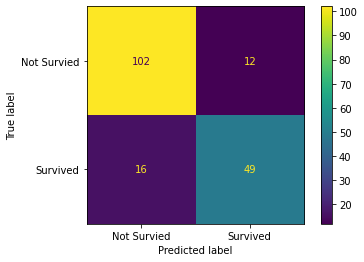

In [ ]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search, 
                                      X_test, 
                                      y_test, 
                                      display_labels=['Not Survied', 'Survived']);

### **Exercise 1:** build the same pipeline using a KNN instead of a decision tree.

Read the Platform lesson on KNN: https://platform.wbscodingschool.com/courses/data-science/11375/ 

> **Tip**: Check the SciKit-Learn docummentation to find how to import the KNN model for this task and how to tune its hyperparameters (the names and possible values of the parameters).


In [ ]:
# solution
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn_full_pipeline = make_pipeline(preprocessor,
                                  KNeighborsClassifier()
                                 )
from sklearn.model_selection import GridSearchCV

param_grid = {
    "columntransformer__pipeline-1__simpleimputer__strategy":["mean", "median"],
    "kneighborsclassifier__n_neighbors": range(2, 50),
    "kneighborsclassifier__weights": ["uniform", "distance"]
}

knn_search = GridSearchCV(knn_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

knn_search.fit(X_train, y_train)

scores["knn"] = knn_search.best_score_

scores

Fitting 5 folds for each of 192 candidates, totalling 960 fits


{'dtree': 0.8061656653205947, 'knn': 0.7373781148429036}

In [ ]:
knn_search.best_params_

{'columntransformer__pipeline-1__simpleimputer__strategy': 'median',
 'kneighborsclassifier__n_neighbors': 32,
 'kneighborsclassifier__weights': 'distance'}

### **Exercise 2:** build the same pipeline using other algorithms

Go through the Plaform lesson on Model Selection () and check the performance of, at least, the following algorithms: 

* Logistic Regression
* Support Vector Machine
* Random Forest

In [ ]:
# your code here

## **Your challenge**

In a new notebook, apply everything you have learned here to the Housing project, following the Learning platform.